In [2]:
import time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sb 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from fancyimpute import KNN


Introdução

In [3]:
# Ler os dados atribuindo a 'df' o dataset 'hcc_dataset.csv' 
df = pd.read_csv("hcc_dataset.csv", sep = ',')

In [4]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


In [130]:
# Imprimir a parte inicial de 'df'
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


In [22]:
df.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [132]:
(df == '?').sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [133]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


In [5]:
# Substituir 'die' por 0 e 'live' por 1 na coluna 'Class'
df['Class'] = df['Class'].replace({'Dies': 0, 'Lives': 1})

In [135]:
df['Class']

0      1
1      1
2      1
3      0
4      1
      ..
160    1
161    0
162    1
163    0
164    0
Name: Class, Length: 165, dtype: int64

In [136]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,1
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,1
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,0


In [6]:
#Contar quantos pacientes estão classificados como "dies" (0)
(df['Class'] == 0).sum()

63

In [138]:
#Contar quantos pacientes estão classificados como "lives" (1)
(df['Class'] == 1).sum()

102

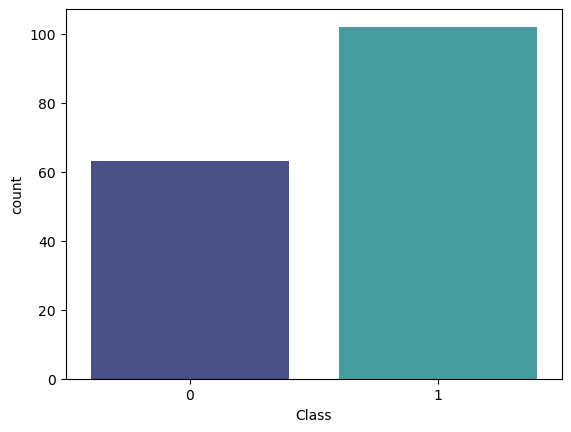

In [140]:
# Distribuição da classe-alvo
sb.countplot(x='Class', data=df, palette='mako')
plt.show()

In [7]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,1
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,1
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,0


In [8]:
# Substituir 'Male' por 0 e 'Female' por 1 na coluna 'Gender'
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [143]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,1,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,0,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,0,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,1
161,1,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,0,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,0


In [9]:
# Substituir 'No' por 0 e 'Yes' por 1 em todo o DataFrame, ignorando NaN
df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [20]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,1,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,0,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,0,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,?,?,?,1,1,0,1,...,109,7.6,0.7,5,3,?,?,?,?,1
161,1,1,0,?,?,?,?,1,0,0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,0,0,1,0,0,0,0,1,0,1,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,0,0,1,1,0,1,1,1,1,1,...,170,8.4,0.74,5,18,?,?,?,?,0


In [145]:
df['PS'].unique()

array(['Active', 'Ambulatory', 'Restricted', 'Selfcare', 'Disabled'],
      dtype=object)

In [10]:
# Criar um dicionário de mapeamento de valores
ps = {'Active': 0, 'Ambulatory': 1, 'Restricted': 2, 'Selfcare': 3, 'Disabled': 4}

# Substituir os valores na coluna 'PS' pelos números correspondentes
df['PS'].replace(ps, inplace=True)

In [147]:
df['PS'].head(20)

0     0
1     0
2     1
3     0
4     0
5     2
6     0
7     3
8     2
9     0
10    0
11    0
12    0
13    0
14    1
15    2
16    3
17    1
18    2
19    0
Name: PS, dtype: int64

In [148]:
df['Encephalopathy'].unique()

array([nan, 'Grade I/II', '?', 'Grade III/IV'], dtype=object)

In [11]:
# Criar um dicionário de mapeamento de valores
encefalopatia = {None: 1, 'Grade I/II': 2, 'Grade III/IV': 3}

# Substituir os valores na coluna 'PS' pelos números correspondentes
df['Encephalopathy'].replace(encefalopatia, inplace=True)

In [150]:
df['Encephalopathy'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    1
16    2
17    1
18    1
19    1
Name: Encephalopathy, dtype: object

In [151]:
df['Ascites'].unique()

array([nan, 'Mild', 'Moderate/Severe', '?'], dtype=object)

In [12]:
# Criar um dicionário de mapeamento de valores
ascites = {None: 1, 'Mild': 2, 'Moderate/Severe': 3}

# Substituir os valores na coluna 'PS' pelos números correspondentes
df['Ascites'].replace(ascites, inplace=True)

In [154]:
df['Ascites'].head(20)

0     1
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     2
9     1
10    2
11    1
12    1
13    1
14    2
15    2
16    1
17    1
18    1
19    3
Name: Ascites, dtype: object

In [155]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,1,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,0,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,0,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,?,?,?,1,1,0,1,...,109,7.6,0.7,5,3,?,?,?,?,1
161,1,1,0,?,?,?,?,1,0,0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,0,0,1,0,0,0,0,1,0,1,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,0,0,1,1,0,1,1,1,1,1,...,170,8.4,0.74,5,18,?,?,?,?,0


In [156]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,1,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,0,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,0,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,?,?,?,1,1,0,1,...,109,7.6,0.7,5,3,?,?,?,?,1
161,1,1,0,?,?,?,?,1,0,0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,0,0,1,0,0,0,0,1,0,1,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,0,0,1,1,0,1,1,1,1,1,...,170,8.4,0.74,5,18,?,?,?,?,0


In [13]:
df.replace('?', np.nan, inplace=True)

In [158]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,1
1,1,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,1
2,0,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,0
4,0,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109,6.9,1.8,1,9,NaN,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,...,109,7.6,0.7,5,3,NaN,NaN,NaN,NaN,1
161,1,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,...,280,6.7,0.7,1,2.2,2.3,NaN,NaN,NaN,0
162,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,181,7.5,1.46,5,18.6,NaN,NaN,NaN,NaN,1
163,0,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,...,170,8.4,0.74,5,18,NaN,NaN,NaN,NaN,0


In [14]:
# Utilizar o KNN para preencher os espaços vazios
# Utiliza as 3 linhas mais próximas para preencher os valores em falta em cada linha
# Devolve um np.array que guardamos como um dataframe do pandas
nome_colunas = df.columns
df_filled = pd.DataFrame(KNN(3).fit_transform(df))
df_filled = df_filled.round().astype(int)
df_filled.columns = nome_colunas

Imputing row 1/165 with 4 missing, elapsed time: 0.022
Imputing row 101/165 with 6 missing, elapsed time: 0.042


In [190]:
df_filled

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,7,1,1,4,0,173,78,680,1
1,1,0,0,0,0,0,1,1,0,0,...,116,8,1,1,2,0,188,69,528,1
2,0,0,1,1,0,1,0,1,0,1,...,109,7,2,5,13,0,28,6,16,1
3,0,1,1,0,0,0,0,1,0,1,...,174,8,1,2,16,0,72,26,385,0
4,0,1,1,1,0,1,0,1,0,1,...,109,7,2,1,9,0,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,0,0,0,1,1,0,1,...,109,8,1,5,3,0,101,49,604,1
161,1,1,0,0,0,0,1,1,0,0,...,280,7,1,1,2,2,83,26,194,0
162,0,0,1,0,0,0,0,1,0,1,...,181,8,1,5,19,20,24,10,473,1
163,0,0,1,1,0,1,1,1,1,1,...,170,8,1,5,18,1,53,22,388,0


In [24]:
# Correlation matrix
corr = df_filled.corr()
# Renomear as linhas e colunas com os nomes das variáveis
corr.index = df_filled.columns
corr.columns = df_filled.columns
corr.style.background_gradient(cmap='mako')

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
Gender,1.000000,-0.075872,-0.442103,-0.160737,-0.038303,-0.049867,0.087904,-0.253663,0.003893,-0.259292,-0.072188,0.052659,-0.103245,-0.095716,-0.041273,0.047977,0.032006,-0.162173,-0.162230,-0.205939,-0.073553,0.037789,-0.030195,-0.172121,-0.247439,-0.127590,-0.133222,-0.037534,-0.134181,-0.101264,-0.036448,0.000943,-0.130962,-0.046286,0.071494,0.016858,-0.128373,-0.095846,-0.158150,-0.074708,0.118041,-0.103708,-0.045516,0.136534,0.064370,-0.090507,-0.120883,-0.079978,-0.026917,0.038435
Symptoms,-0.075872,1.000000,-0.009763,0.101375,0.055216,0.111965,-0.000000,-0.101375,0.071842,0.079388,-0.098735,-0.091915,0.021262,0.123879,0.026261,-0.192450,0.039904,-0.119919,-0.000000,0.072727,0.124515,0.249029,0.073796,-0.004841,0.137729,-0.094780,0.244800,0.080533,0.188713,-0.065486,0.050066,-0.170136,-0.151808,0.102906,0.164638,-0.145084,0.062737,0.075371,0.090934,0.119924,0.212868,0.067350,-0.119980,0.069529,0.189918,0.094889,-0.180047,-0.092523,0.095227,-0.238165
Alcohol,-0.442103,-0.009763,1.000000,-0.085396,0.046359,-0.068765,-0.189668,0.458652,-0.080658,0.210813,0.003330,0.093579,0.124961,-0.024015,-0.033330,-0.022546,-0.058826,0.251077,0.162693,0.400272,0.146480,0.012764,0.191640,0.162934,0.417335,-0.055433,0.132551,0.122454,0.197868,0.217796,0.071130,-0.113874,0.192818,-0.078160,-0.129666,-0.136089,0.023693,0.001264,0.048781,0.106201,-0.111003,-0.095284,0.006307,0.023266,-0.182555,-0.025939,0.046867,0.041296,0.058110,-0.040302
HBsAg,-0.160737,0.101375,-0.085396,1.000000,0.238293,0.404490,-0.037689,0.107383,0.345942,0.079713,-0.198365,-0.121702,-0.068974,-0.000513,0.003803,0.108696,-0.073971,0.045955,-0.046927,-0.028964,0.074834,0.174012,-0.086300,0.021509,-0.004467,0.218076,0.103076,0.215472,0.060672,-0.032877,-0.022021,0.019540,0.087715,0.033528,-0.089071,0.066732,0.140057,0.078469,0.085259,-0.010983,0.024083,-0.048605,0.068834,0.119858,0.122728,0.114745,-0.041206,-0.033876,-0.055839,0.046755
HBeAg,-0.038303,0.055216,0.046359,0.238293,1.000000,0.142754,-0.043444,0.025589,-0.019834,-0.061369,-0.057491,-0.029001,-0.016436,-0.060584,-0.029001,-0.010626,-0.017627,0.052971,0.076680,0.055216,-0.041251,-0.041251,-0.115111,-0.009943,0.075929,-0.025325,0.199322,0.337950,0.064604,0.091602,0.002188,-0.033644,0.149682,-0.040350,-0.031900,-0.043580,0.231435,0.091757,0.074153,-0.064906,-0.031928,-0.006440,0.147784,-0.075193,-0.069154,0.162421,0.033844,0.098246,0.358437,-0.099359
HBcAb,-0.049867,0.111965,-0.068765,0.404490,0.142754,1.000000,0.170027,0.130604,0.102376,0.133062,-0.251979,0.017375,-0.043717,-0.067730,-0.026731,0.141040,0.010561,-0.062721,-0.009947,-0.010179,-0.044992,0.059567,-0.031736,-0.107594,-0.033834,-0.013573,-0.064190,0.101850,-0.012293,-0.115982,-0.050689,0.129801,0.072057,-0.056845,-0.154868,0.026109,-0.096644,0.237336,0.169443,-0.006273,-0.109292,0.140667,-0.065289,-0.027430,-0.107993,-0.111797,0.133257,0.165951,0.072146,0.074342
HCVAb,0.087904,-0.000000,-0.189668,-0.037689,-0.043444,0.170027,1.000000,-0.010518,0.097832,0.032566,0.008692,-0.119205,0.024450,-0.019279,0.055629,0.244600,-0.059170,-0.113892,0.032686,-0.030261,-0.121203,0.086036,0.008933,-0.150339,-0.121230,-0.084931,-0.075849,-0.004874,-0.042259,-0.098204,-0.035708,0.135658,0.023126,0.015246,0.103695,-0.020723,0.157985,0.282291,0.258581,0.037486,0.058978,0.031767,0.177349,0.038888,-0.048463,0.177314,0.061216,0.075112,0.110989,-0.150017
Cirrhosis,-0.253663,-0.101375,0.458652,0.107383,0.025589,0.130604,-0.010518,1.000000,-0.088436,0.046755,0.026778,0.121702,0.068974,-0.126351,-0.129308,0.044593,-0.021382,0.262639,0.251769,0.333089,0.123522,-0.025245,0.086300,-0.001458,0.187465,0.025899,-0.015768,0.073185,0.1798

In [16]:
n_dies = (df['Class'] == 0).sum()
n_lives = (df['Class'] == 1).sum()

In [163]:
Le = LabelEncoder()
label1 = df_filled['Gender']
label2 = df_filled['Symptoms']
label3 = df_filled['Alcohol']
label4 = df_filled['HBsAg']
label5 = df_filled['HBeAg']
label6 = df_filled['HBcAb']
label7 = df_filled['HCVAb']
label8 = df_filled['Cirrhosis']
label9 = df_filled['Endemic']
label10 = df_filled['Smoking']
target = df_filled['Class']

In [197]:
df.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [164]:
df_filled.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.193939,0.666667,0.739394,0.096970,0.006061,0.230303,0.236364,0.903030,0.060606,0.381818,...,216.248485,8.939394,1.242424,2.721212,6.436364,1.733333,84.006061,34.715152,436.600000,0.618182
std,0.396586,0.472840,0.440302,0.296817,0.077850,0.422308,0.426141,0.296817,0.239333,0.487311,...,172.330914,11.424565,0.931505,1.792899,5.024684,3.986461,50.900608,25.738319,377.685357,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,109.000000,6.000000,1.000000,1.000000,2.000000,0.000000,42.000000,16.000000,150.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,163.000000,7.000000,1.000000,2.000000,5.000000,1.000000,83.000000,27.000000,342.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,263.000000,8.000000,1.000000,5.000000,9.000000,1.000000,116.000000,49.000000,635.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,8.000000,5.000000,22.000000,29.000000,224.000000,126.000000,2230.000000,1.000000


In [17]:
# Calcular os valores necessários
soma_total = n_dies + n_lives
dies_percentage = round((n_dies/soma_total)*100, 2)
lives_percentage = round((n_lives/soma_total)*100, 2)

In [25]:
# Criar uma tabela
tabela_ratings = pd.DataFrame({
    'Rating': ["Dies", "Lives"],
    'Total': [n_dies, n_lives],
    'Percentagem': [f"{dies_percentage}%", f"{lives_percentage}%"]
})

display(tabela_ratings)

,Rating,Total,Percentagem
0,Dies,63,38.18%
1,Lives,102,61.82%


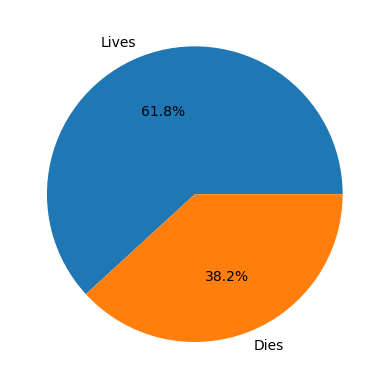

In [19]:
# Criar gráfico circular
x1 = df_filled['Class'].value_counts().values
labels = ['Lives', 'Dies']
plt.pie(x=x1, labels=labels, autopct='%1.1f%%', explode=(0, 0))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

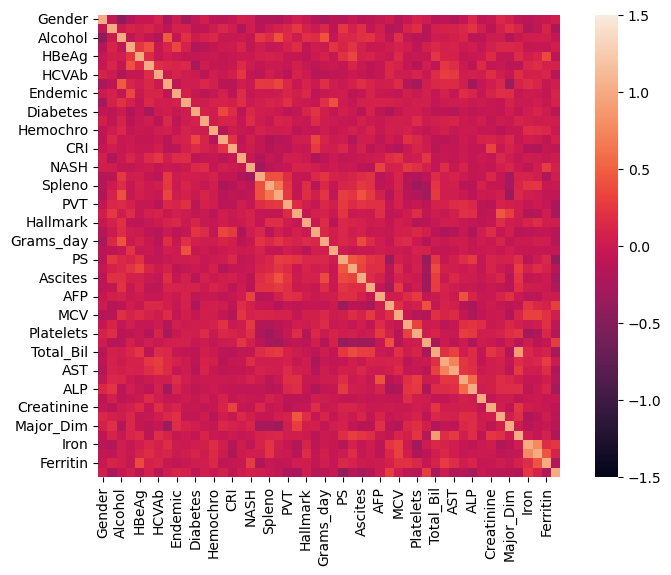

In [186]:
fig=plt.figure(figsize=(9,6))
sb.heatmap(df_filled.corr(numeric_only=True), vmax=1.5, vmin=-1.5, square=True)
plt.show

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 3000x3000 with 0 Axes>

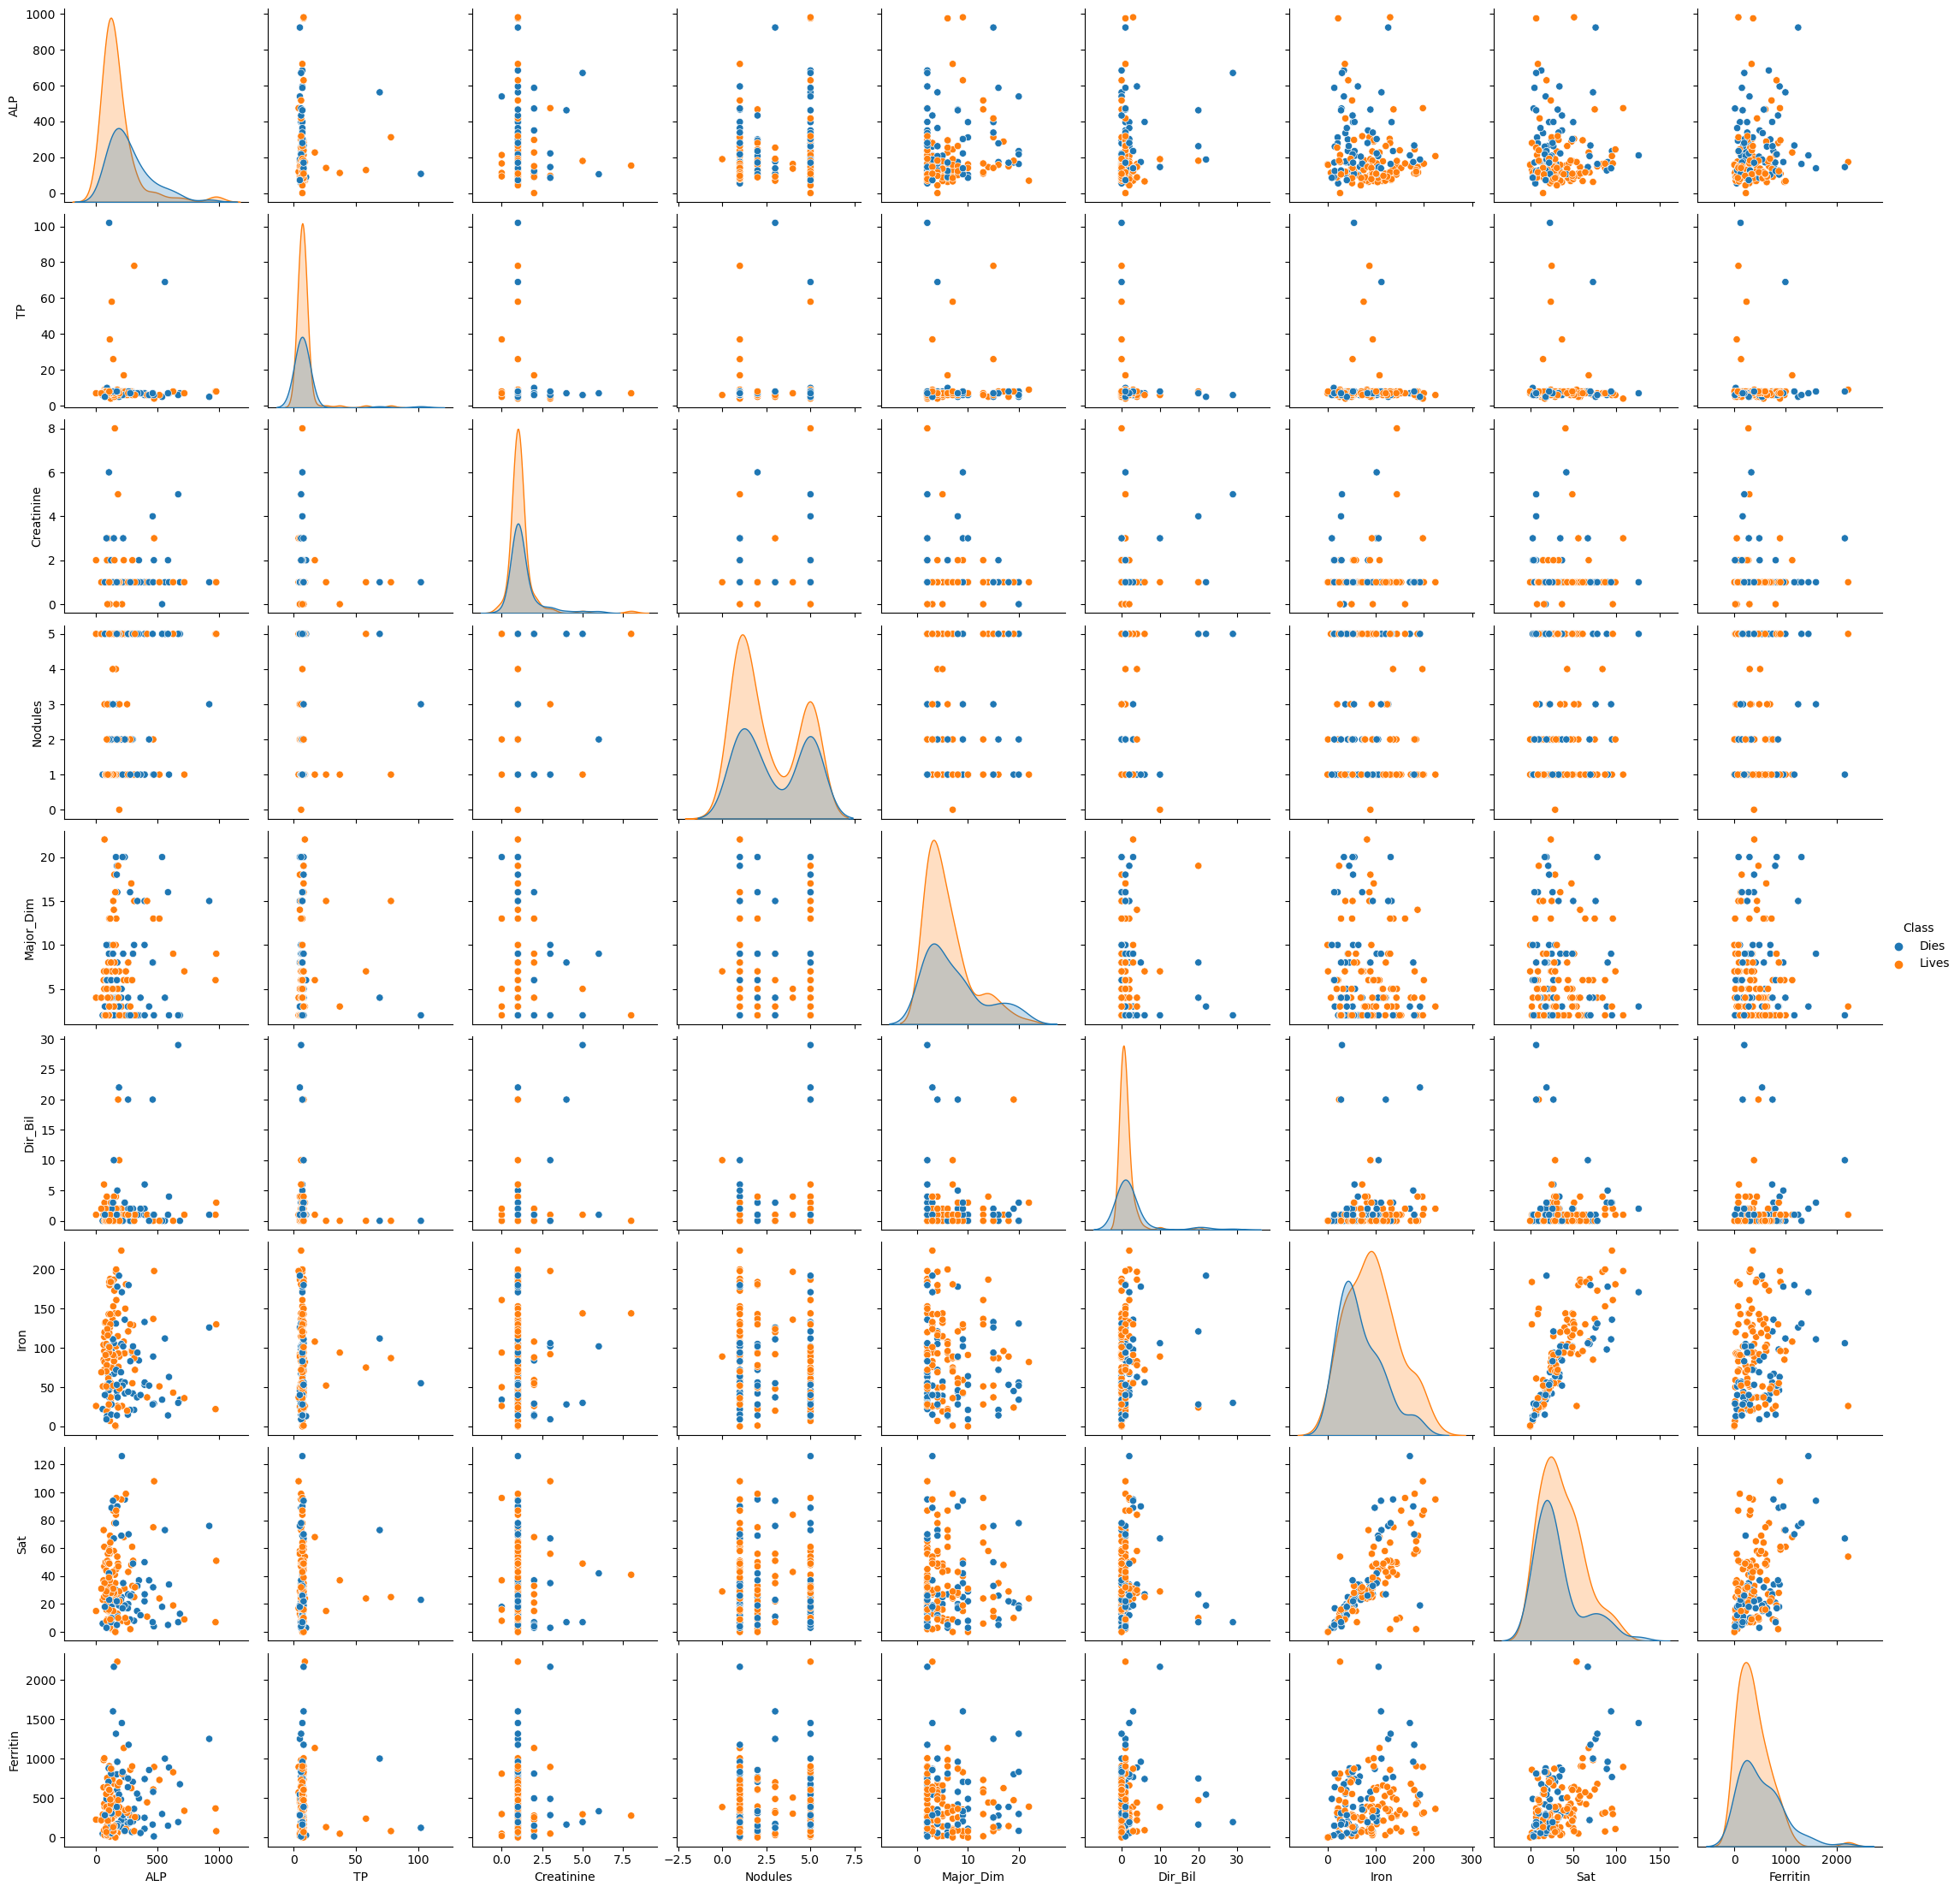

In [20]:
# Definir o tamanho da figura
plt.figure(figsize=(30, 30))

# Selecionar as 25 primeiras colunas
colunas = df_filled.columns[40:]

# Criar o pairplot com as colunas selecionadas
pair_plot = sb.pairplot(df_filled['Class'], hue='Class')

# Mapeamento de rótulos
hue_labels = {'0': 'Dies', '1': 'Lives'}

# Substituir os rótulos na legenda
for text in pair_plot._legend.texts:
    text.set_text(hue_labels[text.get_text()])

# Exibir o pairplot
plt.show()

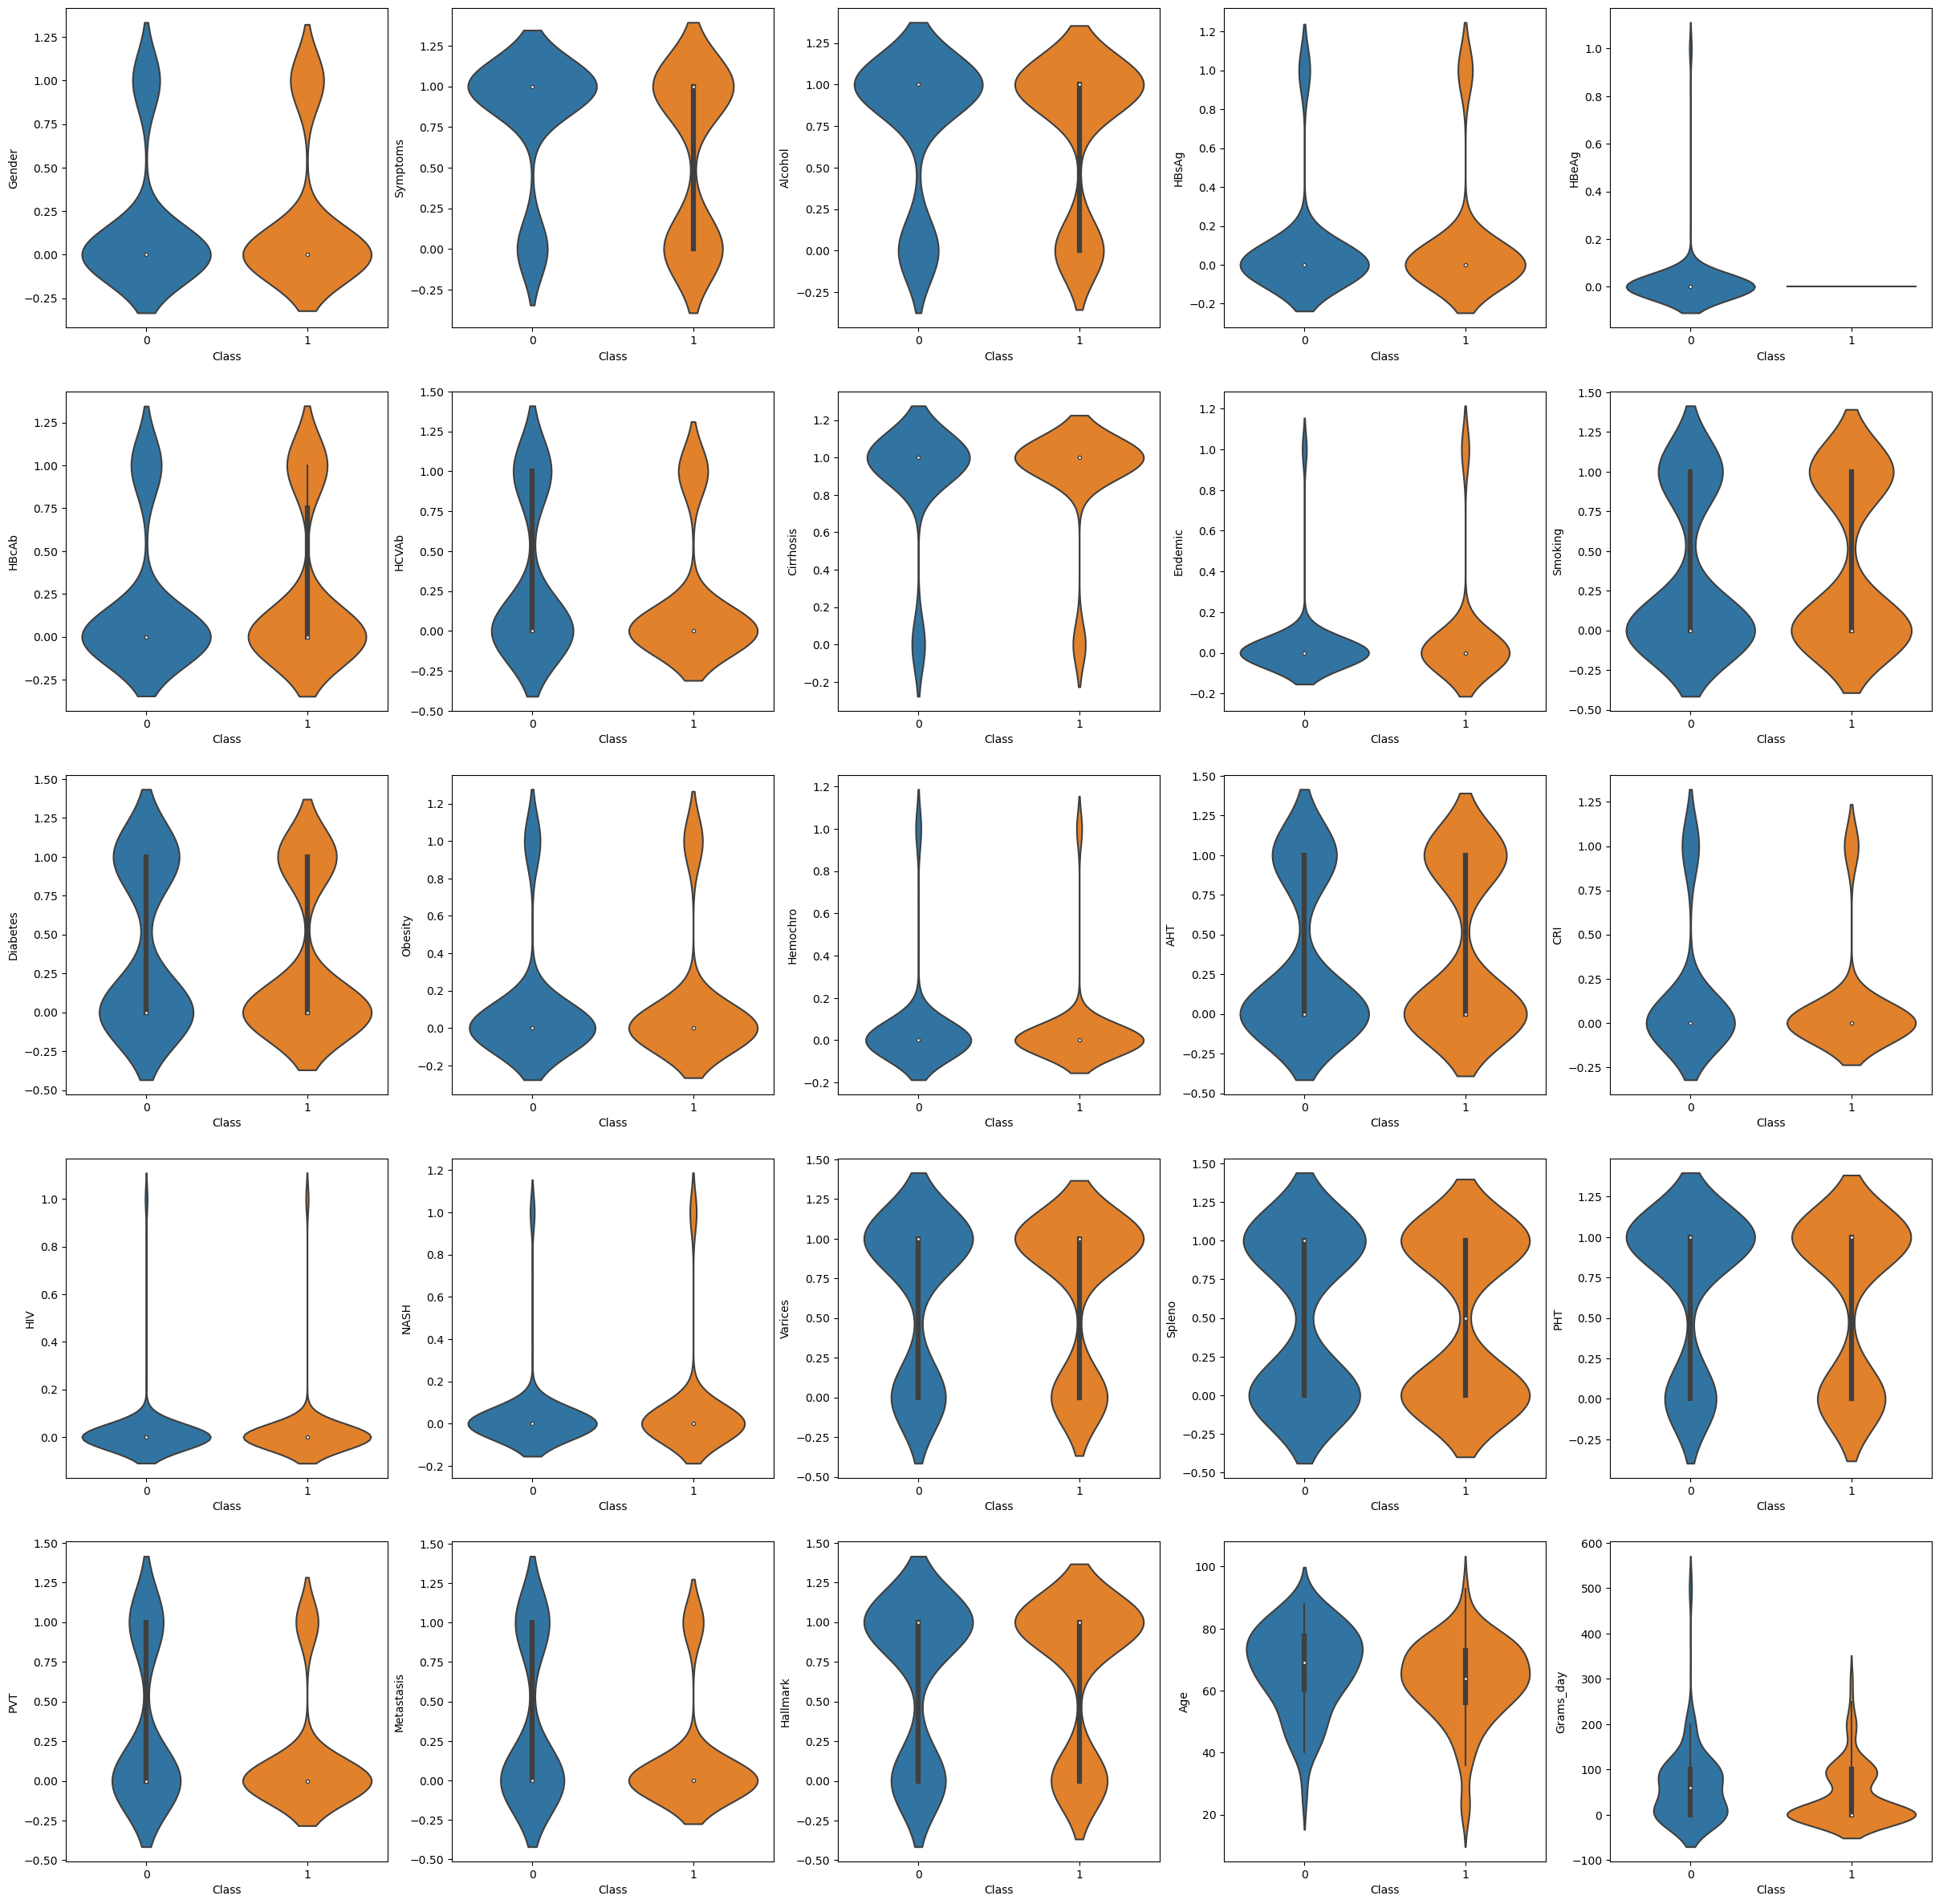

In [203]:
plt.figure(figsize=(30, 30))

colunas = df_filled.columns[:25]

for column_index, column in enumerate(colunas):
    if column != 'Class':
        plt.subplot(5, 5, column_index + 1)
        sb.violinplot(x=target, y=column, data=df_filled)

plt.show()

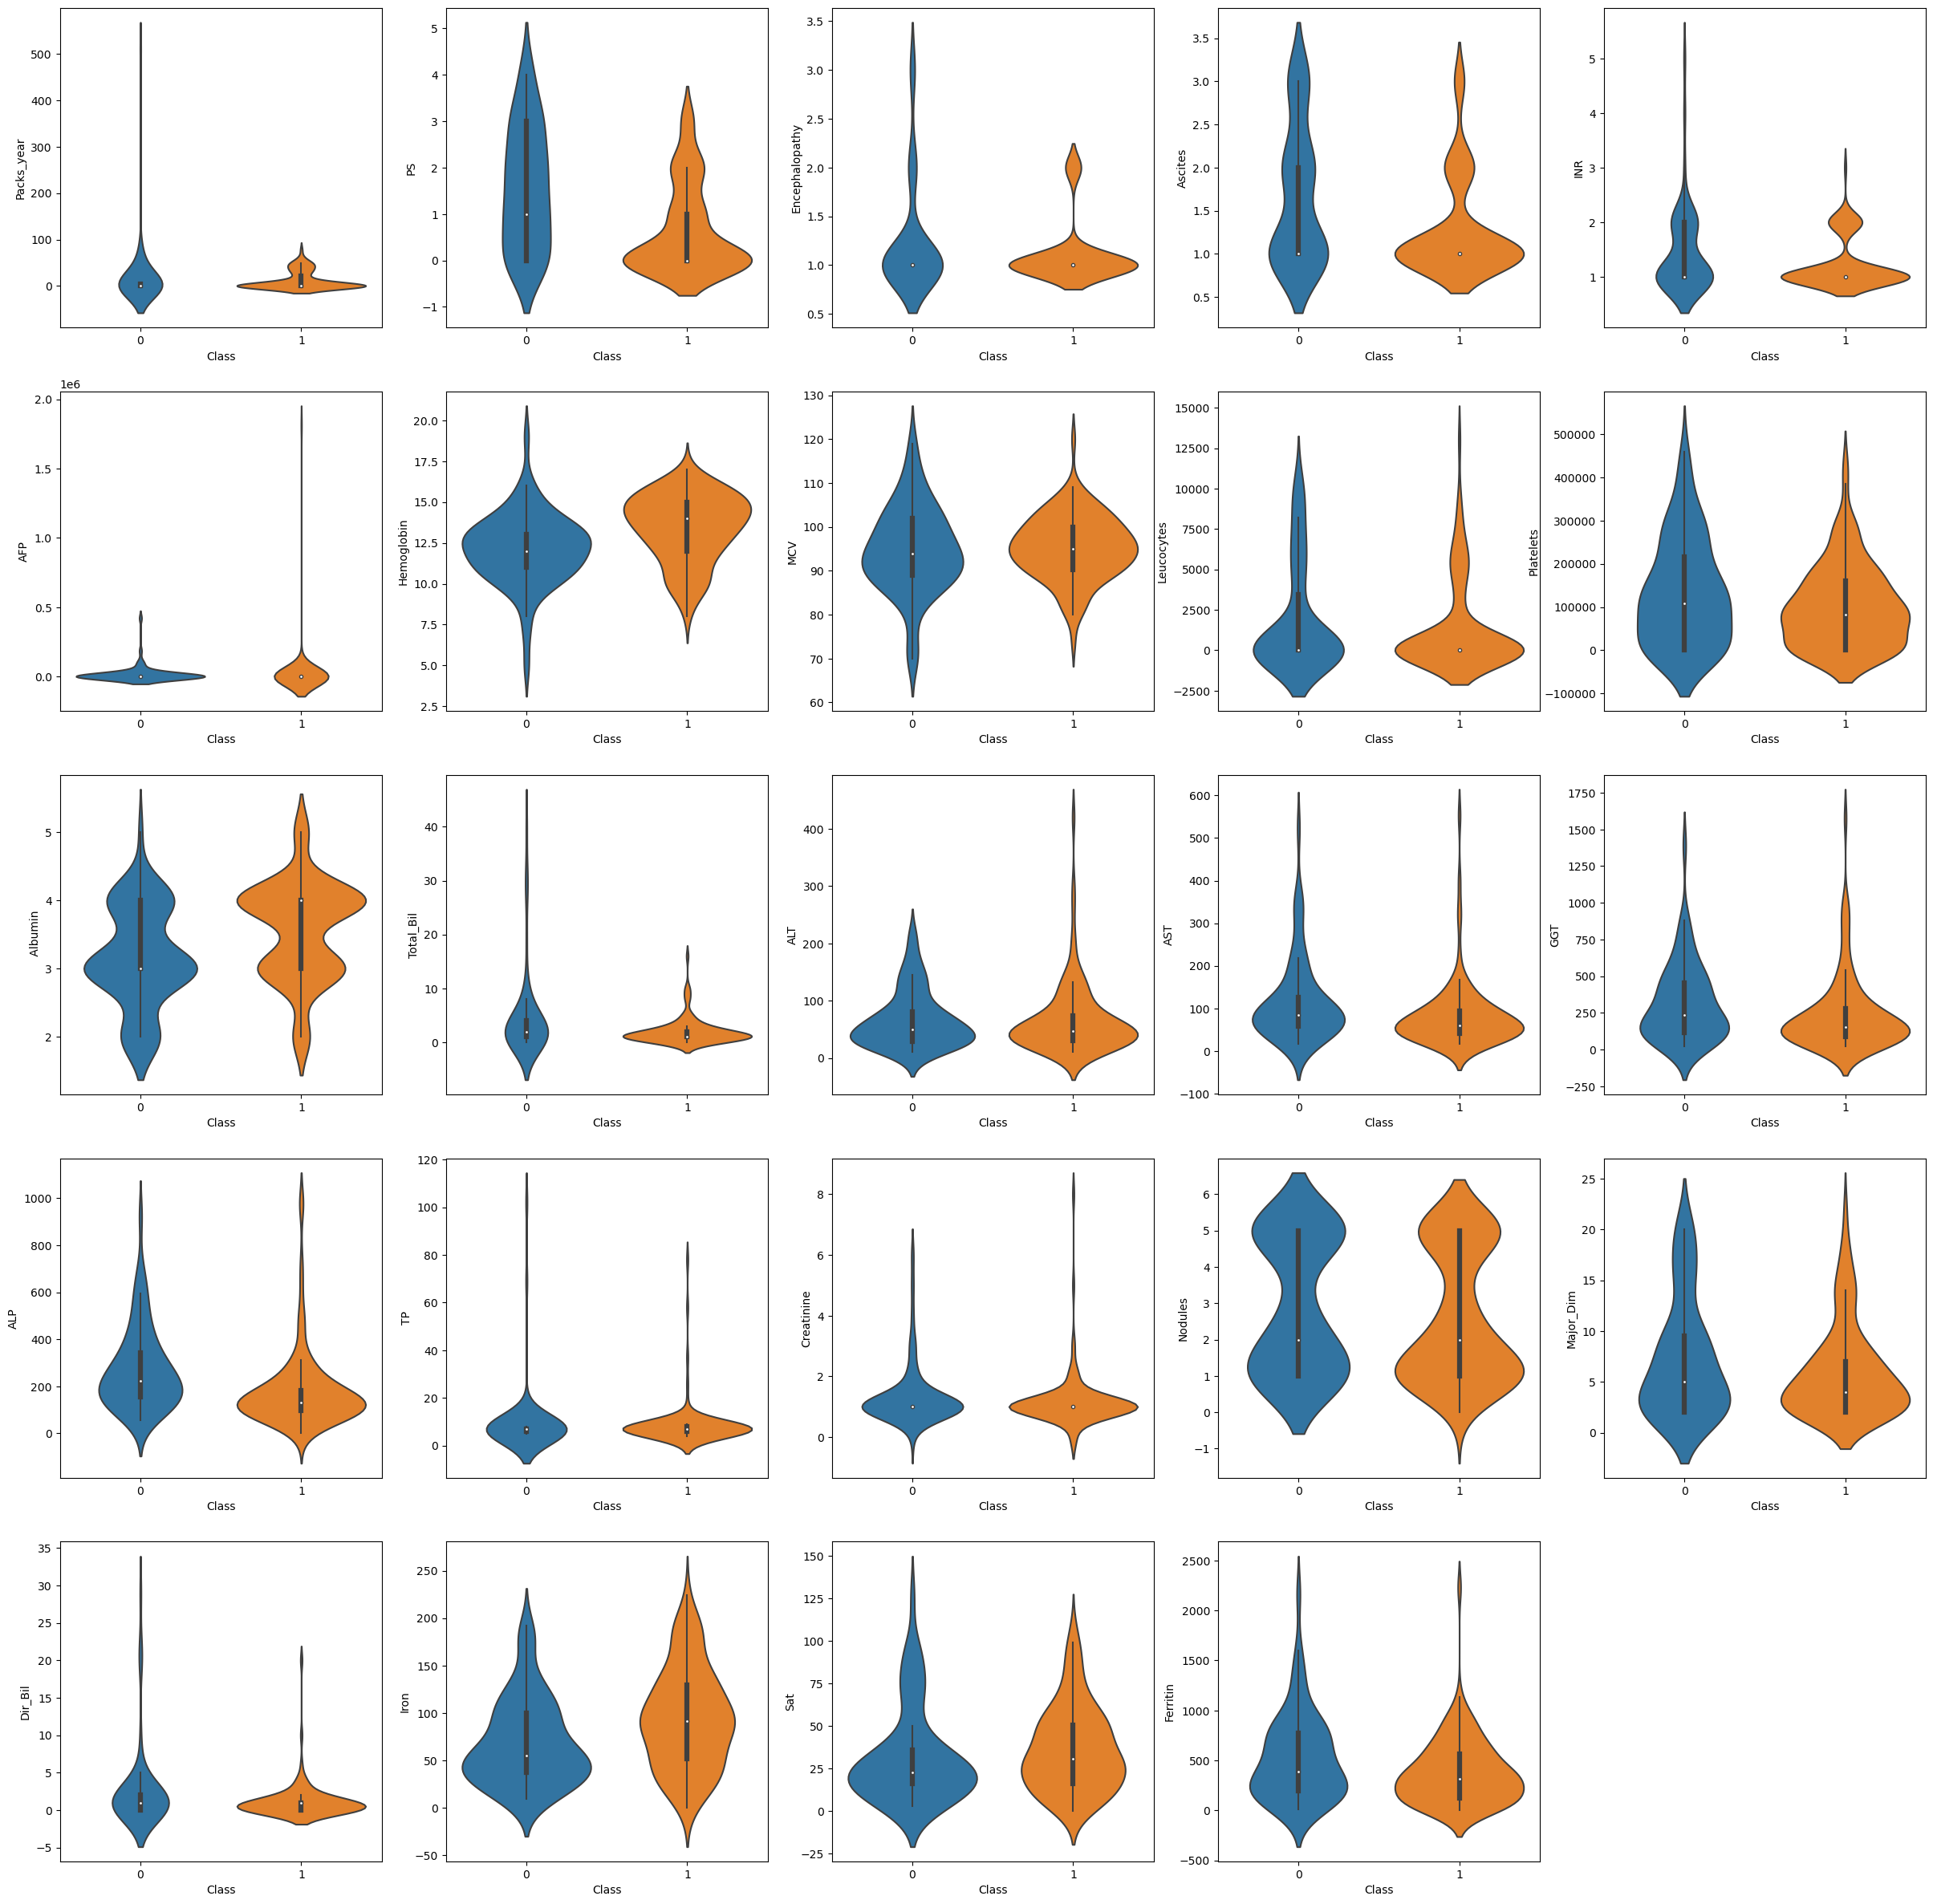

In [204]:
plt.figure(figsize=(30, 30))

colunas = df_filled.columns[25:]

for column_index, column in enumerate(colunas):
    if column != 'Class':
        plt.subplot(5, 5, column_index + 1)
        sb.violinplot(x=target, y=column, data=df_filled)

plt.show()